In [ ]:
pip install citipy 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import api
from api_keys import weather_api_key

#import Citipy
from citipy import citipy

#output file
output_Data_File = "output_data_file/cities.csv"

#define latitude and longitude
lat_range = (-90, 90)
long_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [2]:
# list for holding lat_long and cities
lat_long = []
cities = []

# create various lat and long combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_long = zip(lats, longs)

# identify nearest city for each lat & long combo
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # if city is unique, then add to our cities list
    if city not in cities:
        cities.append(city)

# print city count to confirm count
len(cities) 

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25233509c15b1972d6ea3e4be953184a" 

city_data = []

# create empty lists to append API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# start call counter 
record = 1

# log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# loop through cities in city list 
for city in cities:  
        
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")

# increase counter by one 
        record= record + 1
        
        
# if no record is found, then skip to next call
    except:
        print("City not found. Skipping...")
    continue
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Chichli
Processing Record 2 | Punta Arenas
Processing Record 3 | Barrow
Processing Record 4 | Dingle
Processing Record 5 | Busselton
Processing Record 6 | Kaitangata
Processing Record 7 | Champerico
Processing Record 8 | Arraial do Cabo
Processing Record 9 | Havelock
Processing Record 10 | Bluff
Processing Record 11 | New Norfolk
Processing Record 12 | Tiksi
Processing Record 13 | Saint-Philippe
Processing Record 14 | Klaksvík
Processing Record 15 | Yatou
Processing Record 16 | Būkān
City not found. Skipping...
Processing Record 17 | Nanortalik
Processing Record 18 | Fukuechō
Processing Record 19 | Hermanus
Processing Record 20 | Mataura
Processing Record 21 | Avera
Processing Record 22 | Bredasdorp
Processing Record 23 | Carnarvon
Processing Record 24 | Cape Town
Processing Record 25 | Alto Araguaia
Processing Record 26 | Dikson
Processing Record 27 | Zvishavane
Processing Record 28 | Carson City
Processing

Processing Record 226 | Tynset
Processing Record 227 | Meadow Lake
Processing Record 228 | Alenquer
Processing Record 229 | St. George's
Processing Record 230 | Baykit
Processing Record 231 | Lavrentiya
Processing Record 232 | Hasaki
Processing Record 233 | Sambava
Processing Record 234 | Padina
Processing Record 235 | Kushiro
Processing Record 236 | Nahrin
Processing Record 237 | Miyako
Processing Record 238 | Łapy
Processing Record 239 | Tombouctou
Processing Record 240 | Durango
Processing Record 241 | Chumikan
Processing Record 242 | Berlevåg
Processing Record 243 | Odienné
Processing Record 244 | Ivanava
Processing Record 245 | Buenos Aires
Processing Record 246 | Nikolskoye
Processing Record 247 | Dumas
Processing Record 248 | Mango
Processing Record 249 | Montepuez
Processing Record 250 | Pevek
Processing Record 251 | Farafangana
Processing Record 252 | Hofn
City not found. Skipping...
Processing Record 253 | Fort-Shevchenko
Processing Record 254 | East London
Processing Record 

Processing Record 451 | Port Augusta
Processing Record 452 | Beloha
Processing Record 453 | Maceió
Processing Record 454 | Alekseyevskoye
Processing Record 455 | Kashgar
Processing Record 456 | Airai
Processing Record 457 | Kurya
Processing Record 458 | Esim
Processing Record 459 | Muros
City not found. Skipping...
Processing Record 460 | Deputatsky
Processing Record 461 | Laas
Processing Record 462 | Westport
Processing Record 463 | Aasiaat
Processing Record 464 | Mazagão
Processing Record 465 | Havøysund
Processing Record 466 | Port Lincoln
Processing Record 467 | Lakes Entrance
Processing Record 468 | Bagdarin
City not found. Skipping...
Processing Record 469 | Betanzos
Processing Record 470 | Broken Hill
Processing Record 471 | Otavi
Processing Record 472 | Nesna
Processing Record 473 | Santa Fe
Processing Record 474 | Zhigalovo
Processing Record 475 | Takhtamygda
Processing Record 476 | Kazygurt
City not found. Skipping...
Processing Record 477 | Omboué
Processing Record 478 | Nou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df=pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, 
                      "Max Temp": max_temp, "Humidity": humidity, 
                      "Cloudiness":cloudiness, "Wind Speed": wind_speed,
                     "Country": country, "Date": date})

weather_df.head(5)

# create dataframe
weather_data = pd.DataFrame(weather_df) 
weather_data.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
weather_df.to_csv("Output_CSV/cities.csv", index = False)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chichli,22.8333,78.8167,71.58,20,0,1.03,IN,1614786819
1,Punta Arenas,-53.1500,-70.9167,57.20,54,40,6.91,CL,1614786518
2,Barrow,71.2906,-156.7887,-14.80,76,90,12.66,US,1614786550
3,Dingle,10.9995,122.6711,75.20,88,18,6.46,PH,1614786567
4,Busselton,-33.6500,115.3333,71.01,88,100,5.01,AU,1614786407


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df["Humidity"].max()

weather_df = weather_df[weather_df["Humidity"]<= 100]

weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.634519,18.747985,53.126779,69.613879,51.715302,8.375178,1.614787e+09
std,33.451835,90.648167,31.969440,22.022238,38.860472,6.240432,1.733082e+02
min,-54.800000,-175.200000,-42.050000,1.000000,0.000000,0.810000,1.614786e+09
25%,-8.219100,-58.642600,35.802500,60.000000,10.500000,3.835000,1.614787e+09
50%,24.866650,25.553300,63.455000,75.000000,51.000000,6.810000,1.614787e+09
75%,49.783700,99.507300,78.800000,85.000000,90.000000,11.495000,1.614787e+09
max,78.218600,179.316700,103.100000,100.000000,100.000000,49.480000,1.614787e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_df[weather_df['Humidity']>100].index
indices

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_data.drop(indices, inplace=False)
clean_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chichli,22.8333,78.8167,71.58,20,0,1.03,IN,1614786819
1,Punta Arenas,-53.1500,-70.9167,57.20,54,40,6.91,CL,1614786518
2,Barrow,71.2906,-156.7887,-14.80,76,90,12.66,US,1614786550
3,Dingle,10.9995,122.6711,75.20,88,18,6.46,PH,1614786567
4,Busselton,-33.6500,115.3333,71.01,88,100,5.01,AU,1614786407


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

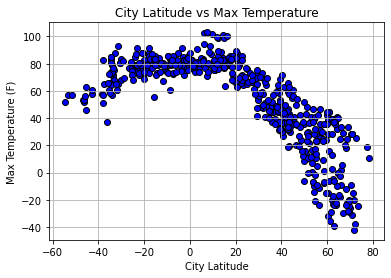

In [12]:
latitude=weather_df["Lat"]
Max_Temp=weather_df["Max Temp"]

#create scatter plot
plt.scatter(latitude, Max_Temp, marker="o", facecolors="blue", edgecolors="black")

#format
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

#save
plt.savefig("Plots/LatitudevsTempPlot.png")
plt.show()


## Latitude vs. Humidity Plot

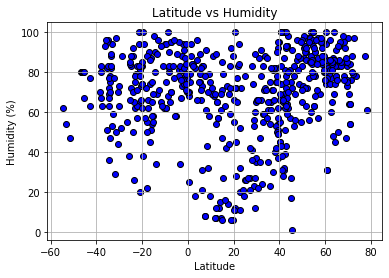

In [13]:
Humidity_data=weather_df["Humidity"]

#create scatter plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="blue", edgecolors="black")

#format
plt.grid()
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save
plt.savefig("Plots/LatitudevsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

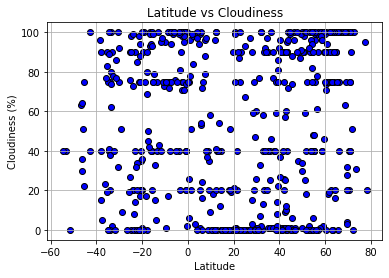

In [15]:
Cloud_Data=weather_df["Cloudiness"]

#make scatter plot
plt.scatter(latitude, Cloud_Data, marker="o", facecolors="blue", edgecolors="black")

#formatting
plt.grid()
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save
plt.savefig("Plots/LatitudevsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

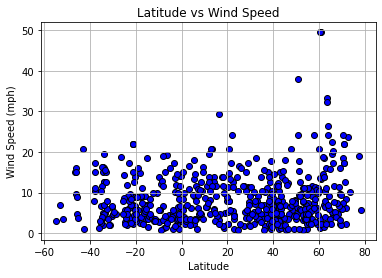

In [16]:
Wind_Speed_Data=weather_df["Wind Speed"]

#create scatter plot
plt.scatter(latitude, Wind_Speed_Data, marker="o", facecolors="blue", edgecolors="black")

#format
plt.grid()
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save
plt.savefig("Plots/LatitudevsWindSpeed.png")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=weather_df[weather_df["Lat"]>0]
Southern_df=weather_df[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

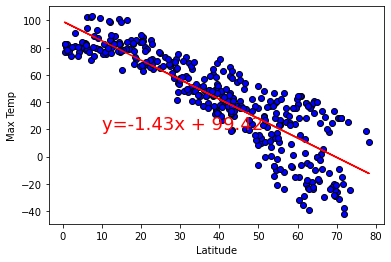

The r-squared is: 0.7469803979232881


In [18]:
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 18)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")
    
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

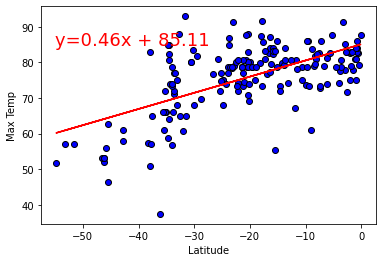

The r-squared is: 0.3754785615320946


In [19]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

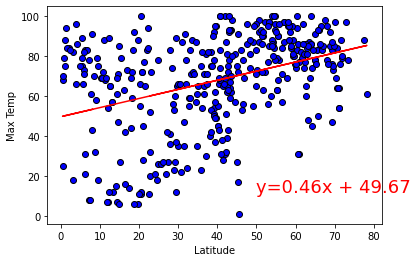

The r-squared is: 0.1455916607901312


In [20]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

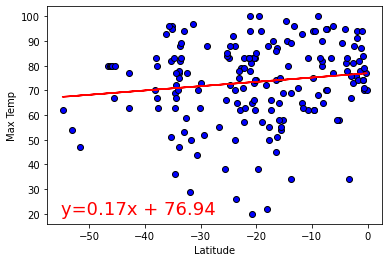

The r-squared is: 0.019390615709390345


In [21]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

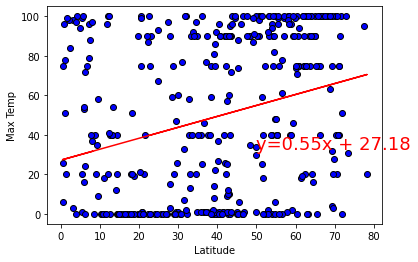

The r-squared is: 0.07641464456017998


In [22]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,33))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

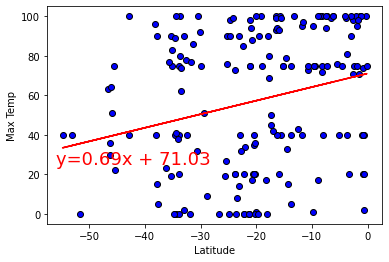

The r-squared is: 0.0645483206469417


In [23]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

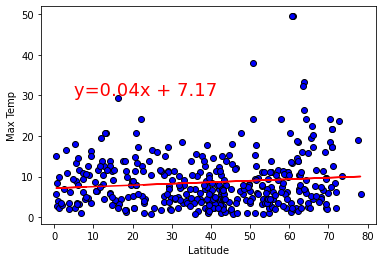

The r-squared is: 0.012261273735744732


In [24]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(5,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

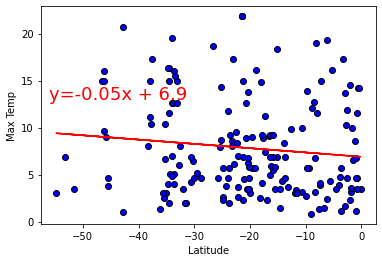

The r-squared is: 0.013085769555272636


In [25]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))